In [1]:
import pandas as pd
from datetime import datetime

# List of file paths
file_paths = [
    '/Users/ash/Desktop/毕业/writer/data/东方财富概念版块/AIGC概念.csv',
    '/Users/ash/Desktop/毕业/writer/data/东方财富概念版块/AI制药.csv',
    '/Users/ash/Desktop/毕业/writer/data/东方财富概念版块/AI手机.csv',
    '/Users/ash/Desktop/毕业/writer/data/东方财富概念版块/AI智能体.csv',
    '/Users/ash/Desktop/毕业/writer/data/东方财富概念版块/AI眼镜.csv',
    '/Users/ash/Desktop/毕业/writer/data/东方财富概念版块/AI芯片.csv',
    '/Users/ash/Desktop/毕业/writer/data/东方财富概念版块/AI语料.csv',
    '/Users/ash/Desktop/毕业/writer/data/东方财富概念版块/ChatGPT概念.csv',
    '/Users/ash/Desktop/毕业/writer/data/东方财富概念版块/DeepSeek概念.csv',
    '/Users/ash/Desktop/毕业/writer/data/东方财富概念版块/MLOps概念.csv'
]

# Function to preprocess each file
def preprocess_file(file_path):
    df = pd.read_csv(file_path)
    df_copy = df.copy()
    
    # Convert 'trade_date' to datetime format
    df_copy['trade_date'] = pd.to_datetime(df_copy['trade_date'], format='%Y%m%d')
    
    # Extract year, month, and day
    df_copy['year'] = df_copy['trade_date'].dt.year
    df_copy['month'] = df_copy['trade_date'].dt.month
    df_copy['day'] = df_copy['trade_date'].dt.day
    
    return df_copy

# Preprocess all files
preprocessed_data = [preprocess_file(file_path) for file_path in file_paths]


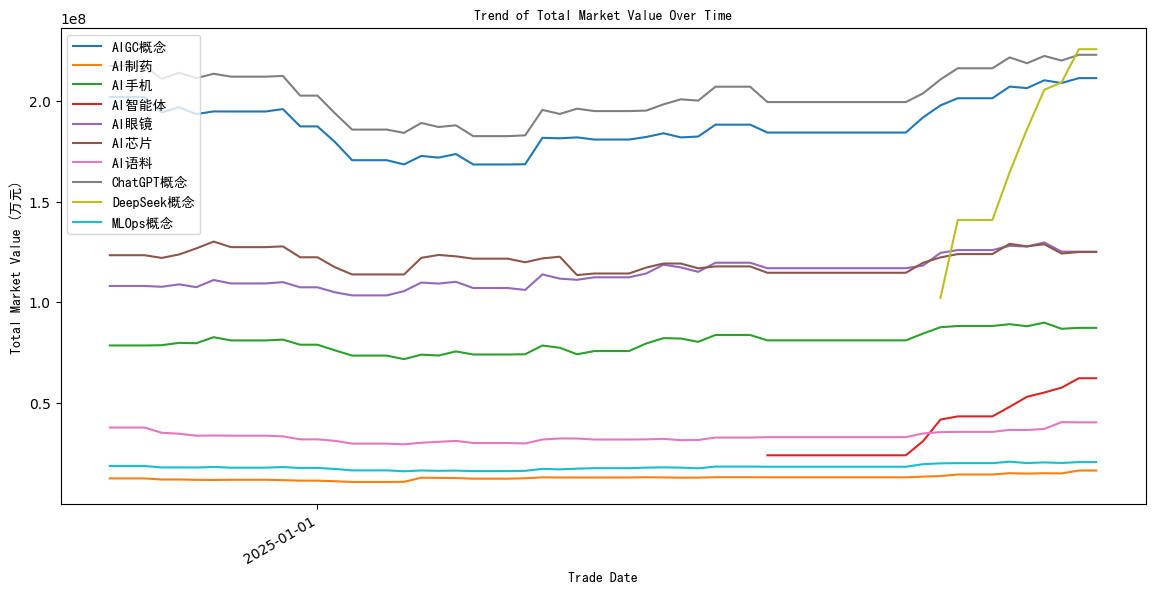

In [2]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Define the font path
font_path = "/Library/Fonts/SimHei.ttf"
font_prop = FontProperties(fname=font_path)

# Initialize the plot
plt.figure(figsize=(14, 7))

# Plot each file's data
for i, df in enumerate(preprocessed_data):
    label = file_paths[i].split('/')[-1].replace('.csv', '')
    plt.plot(df['trade_date'], df['total_mv'], label=label)

# Set plot labels and title
plt.xlabel('Trade Date', fontproperties=font_prop)
plt.ylabel('Total Market Value (万元)', fontproperties=font_prop)
plt.title('Trend of Total Market Value Over Time', fontproperties=font_prop)

# Add legend
plt.legend(prop=font_prop)

# Format x-axis to display dates nicely
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gcf().autofmt_xdate()
